# Apple Stocks Analysis (using R)
---
### Similar project to the Python equivalent.

In [1]:
suppressMessages(require(dplyr))
suppressMessages(require(ggplot2))
suppressMessages(require(gridExtra))
suppressMessages(require(scales))
suppressMessages(require(grid))

options(warn=-1)

# Read in the stockdata
stock <- read.csv("/Users/HarleyMAC/Documents/GitHub/personal-projects/Apple Stock (R)/aapl.csv")

## Functions

In [2]:
eleven_days <- function(d) 
{
    
    #     This function creates a factor with the given date, the five dates before,
    #     and the five dates after. This is because there are sometimes missing 
    #     trading days when trying to produce a launch week. This comes in handy in 
    #     the launch_week function.
    #     Accepts a date as a character.
    
    c <- as.Date(d, tz = "EST")
    days <- c(d1 <- c-5, d2 <- c-4, d3 <- c-3, d4 <- c-2, 
              d5 <- c-1, d6 <- c, d7 <- c+1, d8 <- c+2, 
              d9 <- c+3, d10 <- c+4, d11 <- c+5)
    days
}

launch_close <- function(d)
{
    #     Take a given date, check the stock data, and return the closing price for
    #     that date. 
    #     Accepts a date as a character.

    condition <- stock %>%
        filter(Date == as.character(d))
    condition[,5] #Column 5 = Closing Price
}

launch_week <- function(d)
{
    days <- eleven_days(d)
    #Week days as characters so they can be passed to launch_close
    week <- as.character(days)
    #sapply launch_close to each week day
    cprice <- sapply(week,launch_close)
    cweek <- as.double(cprice)
    cweek <- data.frame(days, cweek)
    colnames(cweek) <- c("date","close")
    na.omit(cweek) #return without missing dates
}

launch_stats <- function(ip,lw_ip)
{
    min <- min(lw_ip["close"])
    max <- max(lw_ip["close"])
    diff <- max-min
    cat("Launch week stats for: ", ip, "\n")
    cat("Min Price: ", min, " ")
    cat("Max Price: ", max, " ")
    cat("Change over Week: ", diff, "\n\n")
}

closing_year <- function(yr)
{
    cprice <- sapply(yr,launch_close)
    cyear <- as.double(cprice)
    cyear <- data.frame(yr, cyear)
    colnames(cyear) <- c("date","close")
    na.omit(cyear) #return without missing dates
}

## Initialize Variables

In [3]:
ip6 <- 'iPhone 6'
ip6s <- 'iPhone 6s'
ip7 <- 'iPhone 7'
ip8 <- 'iPhone 8'
ipX <- 'iPhone X'
ipXs <- 'iPhone Xs'

ip_6 <- '2014-09-09'
ip_6s <- '2015-09-09'
ip_7 <- '2016-09-07'
ip_8 <- '2017-09-12'
ip_X <- '2017-09-12'
ip_Xs <- '2018-09-12'

lw_ip6 <- launch_week(ip_6)
lw_ip6s <- launch_week(ip_6s)
lw_ip7 <- launch_week(ip_7)
lw_ip8 <- launch_week(ip_8)
lw_ipX <- launch_week(ip_X)
lw_ipXs <- launch_week(ip_Xs)

## Statistics

In [4]:
launch_stats(ip6, lw_ip6)
launch_stats(ip6s, lw_ip6s)
launch_stats(ip7, lw_ip7)
launch_stats(ip8, lw_ip8)
launch_stats(ipX, lw_ipX)
launch_stats(ipXs, lw_ipXs)

Launch week stats for:  iPhone 6 
Min Price:  97.99  Max Price:  101.66  Change over Week:  3.670006 

Launch week stats for:  iPhone 6s 
Min Price:  109.27  Max Price:  115.31  Change over Week:  6.040001 

Launch week stats for:  iPhone 7 
Min Price:  103.13  Max Price:  108.36  Change over Week:  5.230004 

Launch week stats for:  iPhone 8 
Min Price:  158.28  Max Price:  161.5  Change over Week:  3.220001 

Launch week stats for:  iPhone X 
Min Price:  158.28  Max Price:  161.5  Change over Week:  3.220001 

Launch week stats for:  iPhone Xs 
Min Price:  217.88  Max Price:  226.41  Change over Week:  8.529999 



---
## iPhone Launch Analysis

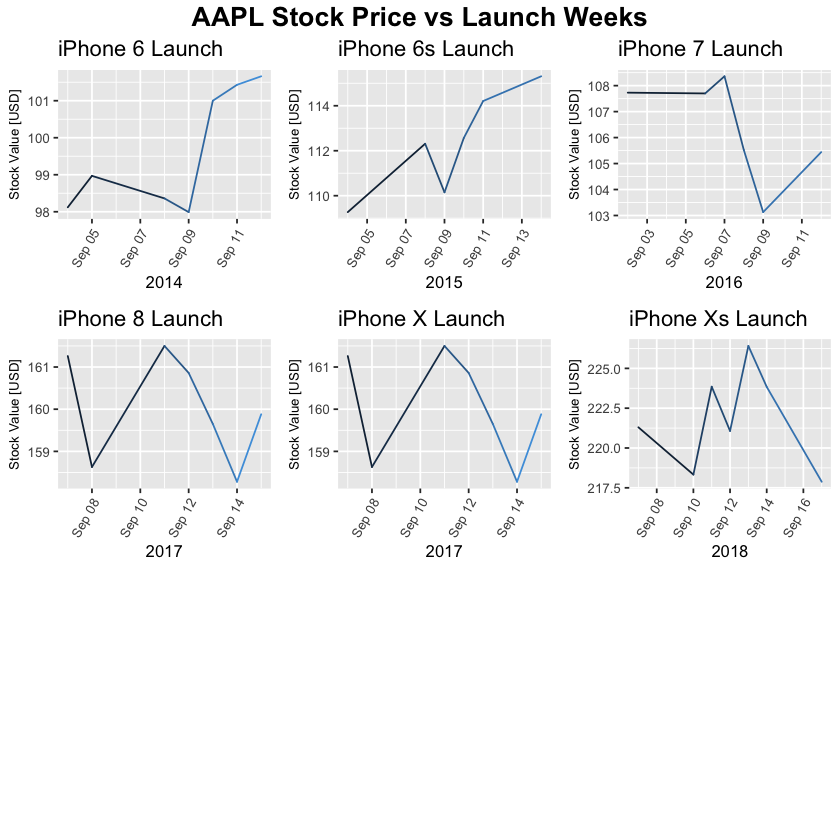

In [5]:
x <- seq(0.01, .99, length.out = 100)
my_theme <- theme(axis.text.x=element_text(size=8, angle=60, hjust=1),
        axis.text.y=element_text(size=8),
        axis.title.x=element_text(size=10),
        axis.title.y=element_text(size=8),
        legend.position="none")

p_ip6 <- ggplot(lw_ip6, aes(x=date, y=close, color=date)) + geom_line(lineend="round") +
    labs(x="2014",y="Stock Value [USD]",title="iPhone 6 Launch") + 
    my_theme
p_ip6s <- ggplot(lw_ip6s, aes(x=date, y=close, color=date)) + geom_line(lineend="round") +
    labs(x="2015",y="Stock Value [USD]",title="iPhone 6s Launch") + 
    my_theme
p_ip7 <- ggplot(lw_ip7, aes(x=date, y=close, color=date)) + geom_line(lineend="round") +
    labs(x="2016",y="Stock Value [USD]",title="iPhone 7 Launch") + 
    my_theme
p_ip8 <- ggplot(lw_ip8, aes(x=date, y=close, color=date)) + geom_line(lineend="round") +
    labs(x="2017",y="Stock Value [USD]",title="iPhone 8 Launch") + 
    my_theme
p_ipX <- ggplot(lw_ipX, aes(x=date, y=close, color=date)) + geom_line(lineend="round") +
    labs(x="2017",y="Stock Value [USD]",title="iPhone X Launch") + 
    my_theme
p_ipXs <- ggplot(lw_ipXs, aes(x=date, y=close, color=date)) + geom_line(lineend="round") +
    labs(x="2018",y="Stock Value [USD]",title="iPhone Xs Launch") + 
    my_theme

grid.arrange(p_ip6,p_ip6s,p_ip7,p_ip8,p_ipX,p_ipXs, nrow = 3, ncol = 3, 
             top=textGrob("AAPL Stock Price vs Launch Weeks", gp=gpar(fontface=2,fontsize=16)))

My goal for producing these graphs was to analyze the relationship between the launch of a new iPhone and the closing stock price of each day in that week. The middle point in each graph signifies the date of the launch.

For three out of six (iP6, iP6s, iPXs) of the product launch weeks, there was a decline in stock price in the days following the event, and then a recovery with increase in the days following. The iPXs recovered but then promply fell the days after.

For three out of six (iP7, iP8, iPX) of the product launch weeks, there was an increase in price leading up to the event, and then the price fell in the following days. Both saw recovery towards the end of the week, however.

My hypothesis before this was that there would be a decline leading up to the event and a spike afterwards, indicating an increase in investor confidence following the reveal of a new product line.

---
## Yearly Stock Plots

In [6]:
yr2014 <- seq(as.Date("2014/1/1"), as.Date("2014/12/31"), "days")
yr2015 <- seq(as.Date("2015/1/1"), as.Date("2015/12/31"), "days")
yr2016 <- seq(as.Date("2016/1/1"), as.Date("2016/12/31"), "days")
yr2017 <- seq(as.Date("2017/1/1"), as.Date("2017/12/31"), "days")
yr2018 <- seq(as.Date("2018/1/1"), as.Date("2018/12/31"), "days")

cyear2014 <- closing_year(yr2014)
cyear2015 <- closing_year(yr2015)
cyear2016 <- closing_year(yr2016)
cyear2017 <- closing_year(yr2017)
cyear2018 <- closing_year(yr2018)

### Theme Setup

In [7]:
my_theme <- theme(axis.text.x=element_text(size=8, angle=60, hjust=1),
        axis.text.y=element_text(size=8),
        axis.title.x=element_text(size=10),
        axis.title.y=element_text(size=8),
        legend.position="none")

p_2014 <- ggplot(cyear2014, aes(x=date, y=close, color=date)) + geom_line(lineend="round") +
    labs(x="Months",y="Stock Value [USD]",title="Closing Values (2014)") + 
    scale_x_date(date_breaks = "1 months", date_labels = "%m-%Y") +
    my_theme
p_2015 <- ggplot(cyear2015, aes(x=date, y=close, color=date)) + geom_line(lineend="round") +
    labs(x="Months",y="Stock Value [USD]",title="Closing Values (2015)") + 
    scale_x_date(date_breaks = "1 months", date_labels = "%m-%Y") +
    my_theme
p_2016 <- ggplot(cyear2016, aes(x=date, y=close, color=date)) + geom_line(lineend="round") +
    labs(x="Months",y="Stock Value [USD]",title="Closing Values (2016)") + 
    scale_x_date(date_breaks = "1 months", date_labels = "%m-%Y") +
    my_theme
p_2017 <- ggplot(cyear2017, aes(x=date, y=close, color=date)) + geom_line(lineend="round") +
    labs(x="Months",y="Stock Value [USD]",title="Closing Values (2017)") + 
    scale_x_date(date_breaks = "1 months", date_labels = "%m-%Y") +
    my_theme
p_2018 <- ggplot(cyear2018, aes(x=date, y=close, color=date)) + geom_line(lineend="round") +
    labs(x="Months",y="Stock Value [USD]",title="Closing Values (2018)") + 
    scale_x_date(date_breaks = "1 months", date_labels = "%m-%Y") +
    my_theme

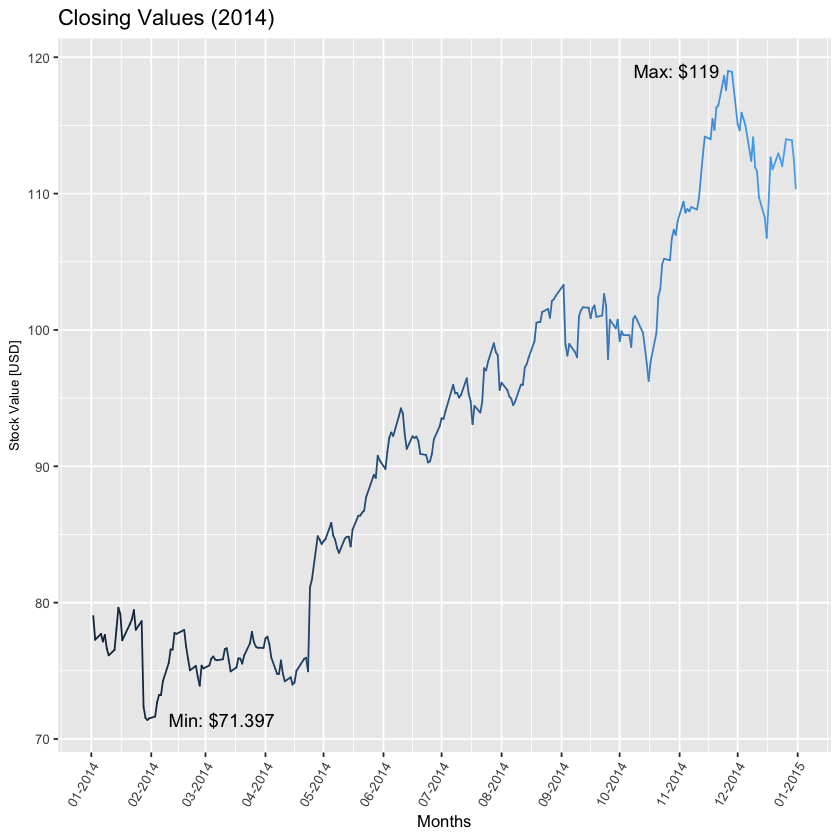

In [8]:
maxPrice <- max(cyear2014[2])
maxDate <- cyear2014[cyear2014[2]==maxPrice,1]

minPrice <- min(cyear2014[2])
minDate <- cyear2014[cyear2014[2]==minPrice,1]

p_2014 +
    annotate(geom="text",x=maxDate, y=maxPrice,label=paste("Max: $", maxPrice, sep = ""),
        hjust=1.1) + 
    annotate(geom="text",x=minDate, y=minPrice,label=paste("Min: $", round(minPrice, digits = 3), sep = ""),
        hjust=-.2)

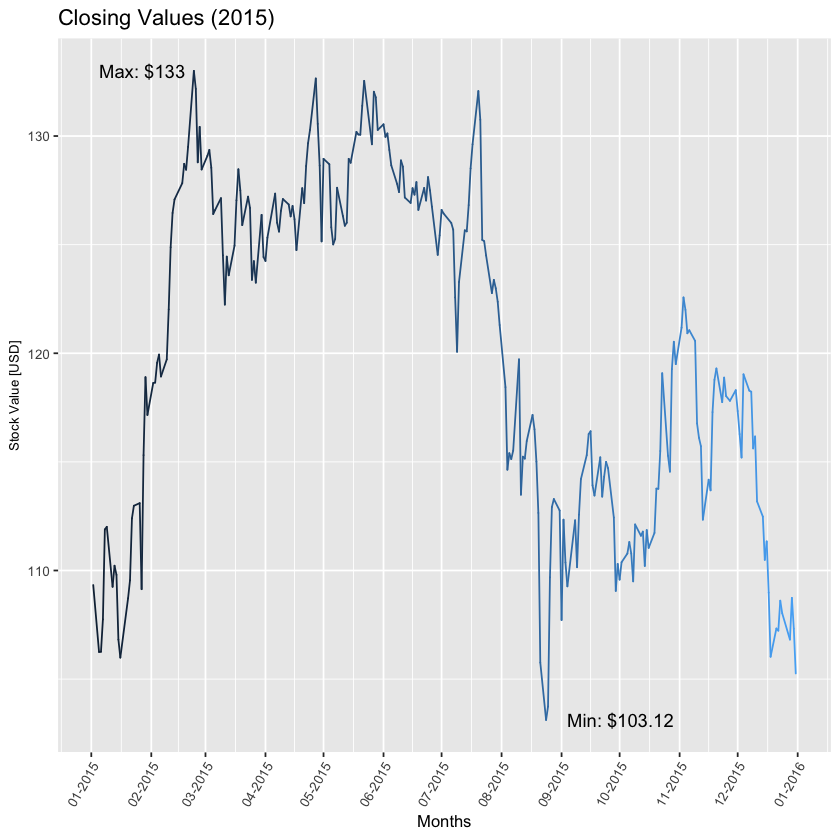

In [9]:
maxPrice <- max(cyear2015[2])
maxDate <- cyear2015[cyear2015[2]==maxPrice,1]

minPrice <- min(cyear2015[2])
minDate <- cyear2015[cyear2015[2]==minPrice,1]

p_2015 +
    annotate(geom="text",x=maxDate, y=maxPrice,label=paste("Max: $", maxPrice, sep = ""),
        hjust=1.1) + 
    annotate(geom="text",x=minDate, y=minPrice,label=paste("Min: $", round(minPrice, digits = 3), sep = ""),
        hjust=-.2)

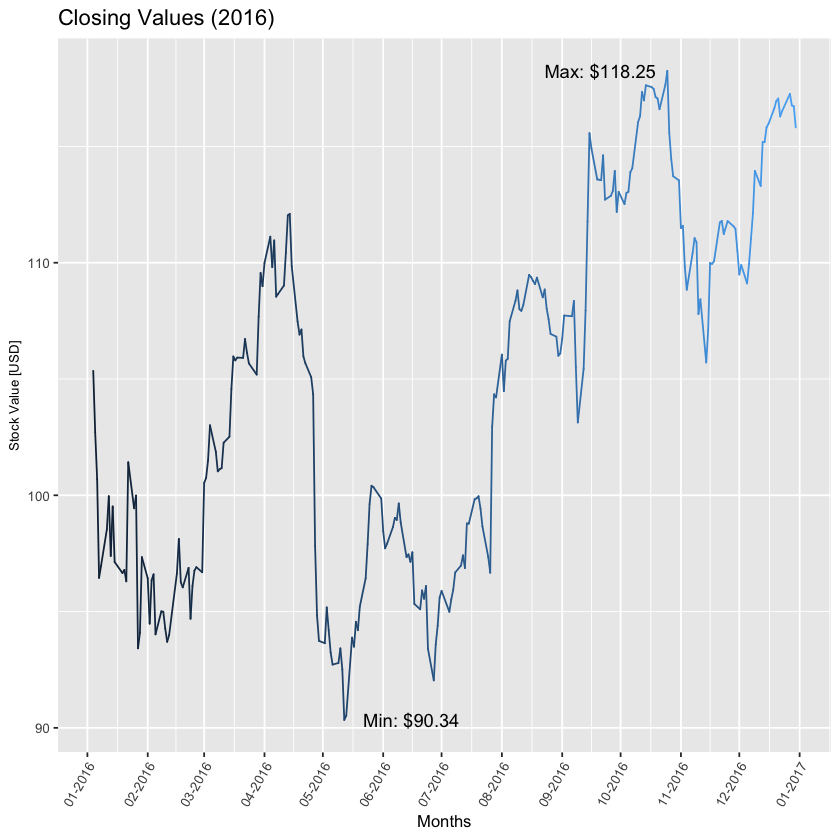

In [10]:
maxPrice <- max(cyear2016[2])
maxDate <- cyear2016[cyear2016[2]==maxPrice,1]

minPrice <- min(cyear2016[2])
minDate <- cyear2016[cyear2016[2]==minPrice,1]

p_2016 +
    annotate(geom="text",x=maxDate, y=maxPrice,label=paste("Max: $", maxPrice, sep = ""),
        hjust=1.1) + 
    annotate(geom="text",x=minDate, y=minPrice,label=paste("Min: $", round(minPrice, digits = 3), sep = ""),
        hjust=-.2)

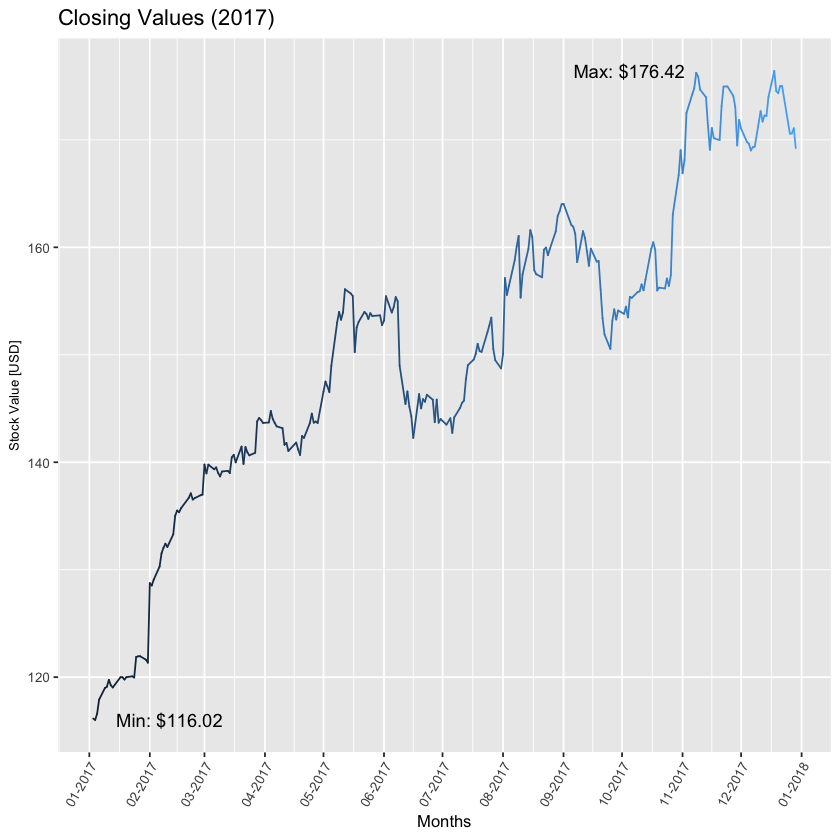

In [11]:
maxPrice <- max(cyear2017[2])
maxDate <- cyear2017[cyear2017[2]==maxPrice,1]

minPrice <- min(cyear2017[2])
minDate <- cyear2017[cyear2017[2]==minPrice,1]

p_2017 +
    annotate(geom="text",x=maxDate, y=maxPrice,label=paste("Max: $", round(maxPrice, digits = 3), sep = ""),
        hjust=1.8) + 
    annotate(geom="text",x=minDate, y=minPrice,label=paste("Min: $", round(minPrice, digits = 3), sep = ""),
        hjust=-.2)

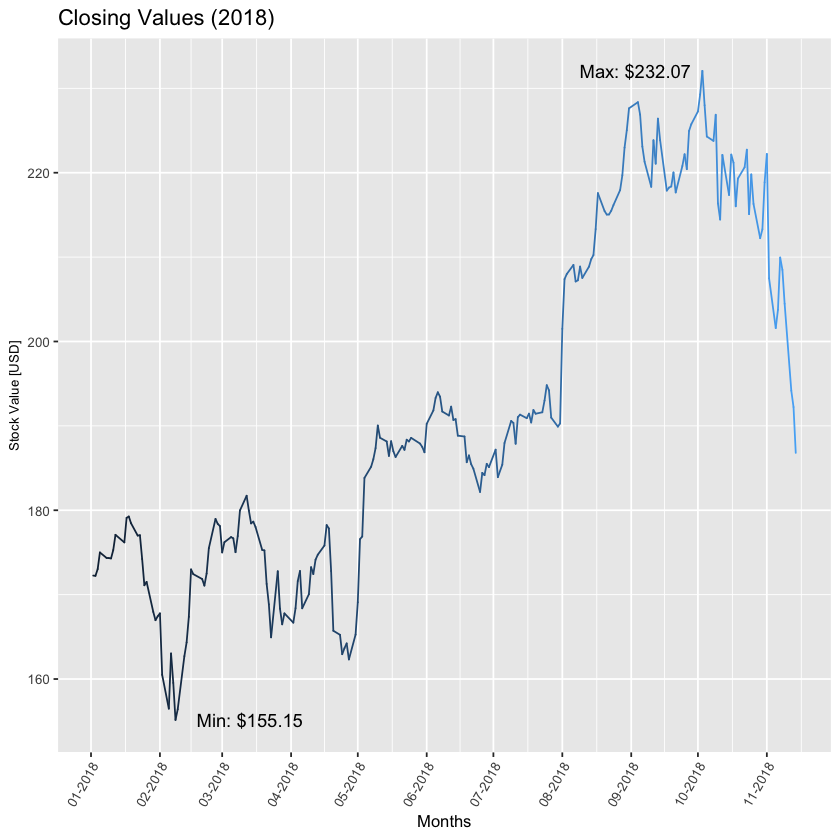

In [12]:
maxPrice <- max(cyear2018[2])
maxDate <- cyear2018[cyear2018[2]==maxPrice,1]

minPrice <- min(cyear2018[2])
minDate <- cyear2018[cyear2018[2]==minPrice,1]

p_2018 +
    annotate(geom="text",x=maxDate, y=maxPrice,label=paste("Max: $", round(maxPrice, digits = 3), sep = ""),
        hjust=1.1) + 
    annotate(geom="text",x=minDate, y=minPrice,label=paste("Min: $", round(minPrice, digits = 3), sep = ""),
        hjust=-.2)